# Assignment 1: Monte Carlo ES (Exploring Starts), for Estimating $\pi \approx \pi^{*}$

* Read carefully the algorithm in 19th slide and **Implement Monte-Carlo Exploring Starts (MC-ES)** for Blackjack problem
* Try to replicate the result of 20th slide (left column)
* Don’t mind the visualization problem, printing tables would be enough
* Submit the source code and the 2 tables (see the example excel file) in ETL

In [1]:
import gym
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib notebook

In [2]:
# For checking convergence
def print_policy(policy, usable_ace):
    print('Usable: {}'.format(usable_ace))
    for p_sum in reversed(range(11, 22)):
        for dealer_card in range(1, 11):
            #print('({}, {}): {}'.format(p_sum, dealer_card, policy[(p_sum, dealer_card, usable_ace)]))
            if policy[(p_sum, dealer_card, usable_ace)] == 1:
                action = 'H' # 1 and 'H' mean 'hit.': get more card.
            else:
                action = 'S' # 0 and 'S' means 'stick.': stop.
            print('{} '.format(action), end='')
        print()

In [3]:
env = gym.make('Blackjack-v0')

In [4]:
n_episodes = 10 * (10 ** 6) 

In [5]:
# Init all possible actions
actions = [0, 1] # 0: stick(stop), 1: hit(take another card)

In [6]:
# Init all possible actions
states = set()
usable_ace = False
for player_sum in range(4,32): # 4 <= player_sum <= 31
    for dealer_card in range(1, 11):
        states.add((player_sum, dealer_card, usable_ace))
usable_ace = True
for player_sum in range(11,22):
    for dealer_card in range(1, 11):
        states.add((player_sum, dealer_card, usable_ace))

In [7]:
# Init arbitrarily policy for all (a,s)-states.
# Init as shown in page 99 of the textbook.
policy = {}
for state in states:
    if state[0] >= 20:
        policy[state] = 0 
    else:
        policy[state] = 1

In [8]:
# Init arbitrarily Q-function for all (a,s)-states. 
Q = dict()

for state in states:
    for action in actions:
        Q[(state, action)] = (0, 0.0) # arbitrarily: all zeros to remove returns. (count, Q-value)

In [9]:
# Action generator based on policy
def do_act(state, policy, init_state=False):
    if init_state:
        # Choose a random action at the initial state.
        return random.choice(actions)
    else:
        return policy[state]

In [10]:
# Loop untill convergence
# for episode in range(n_episodes):
episode = 0

while True:
    # Generate an episode.
    # Init 
    temp_states_actions = list()
    temp_history = list()
    
    # Step 0: The initial step.
    done = False
    s = env.reset()   # random state gererated. state: (player's sum, dealer's showing card, usable ace)
    a = do_act(s, policy, True)
    s_next, r, done, info = env.step(a)
    temp_states_actions.append((s, a))
    temp_history.append((s, a, r))
    s = s_next

    while not done:
        a = do_act(s, policy) 
        s_next, r, done, info = env.step(a)
        temp_states_actions.append((s, a))
        temp_history.append((s, a, r))
        s = s_next
    
    # Init G
    G = 0
    for i, ele in enumerate(reversed(temp_history)):
        s, a, r = ele
        G = G + r
        if (s, a) not in list(reversed(temp_states_actions))[i+1:]:            
            # Update Q-value
            count, incr = Q[(s, a)]
            count += 1
            incr = incr + (1./(count)*(G-incr))
            Q[(s, a)] = (count, incr)
            
            # Update policy
            max_Q = None
            action_max_Q = None
            for j in range(len(actions)):
                q_val = Q[(s, actions[j])][1]
                if max_Q == None:
                    max_Q = q_val
                    action_max_Q = actions[j]
                else:
                    if max_Q < q_val:
                        max_Q = q_val
                        action_max_Q = actions[j]
            
            policy[s] = action_max_Q
            
    if (episode) % 100000 == 0:
        print('episode: {} =========='.format(episode))
        print_policy(policy, True)
        print_policy(policy, False)
        
    episode = episode + 1

episode: 0 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
episode: 100000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S H H 
H H H H H H H H H H 
H H H H S H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H S H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H S H 
H H S S S S H H H H 
H H S S S S H H H H 
H S S S H S H H H H 
H H S H S S H H

episode: 1600000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S S S H H H H 
H H H H H H H H H H 
episode: 1700000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S H S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S 

episode: 3200000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H S S S S H H H H 
H H H H H H H H H H 
episode: 3300000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H S S 

episode: 4800000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S S S H H H H 
H H H H H H H H H H 
episode: 4900000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S 

episode: 6400000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S S S H H H H 
H H H H H H H H H H 
episode: 6500000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S 

episode: 8000000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S S S H H H H 
H H H H H H H H H H 
episode: 8100000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S 

episode: 9600000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S S S H H H H 
H H H H H H H H H H 
episode: 9700000 ==========
Usable: True
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S S S H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
H H H H H H H H H H 
Usable: False
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
S S S S S S S S S S 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H S S S S S H H H H 
H H H S 

KeyboardInterrupt: 

Text(0.5,0,'Player sum')

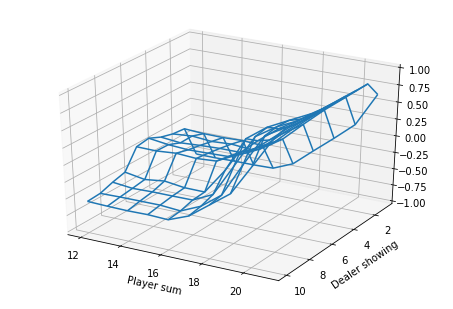

In [11]:
X, Y = np.meshgrid(range(12, 22), range(1, 11))
Z = np.zeros(X.shape)

for i in range(10):
    for j in range(10):
        Z[i,j] = Q[(X[i,j], Y[i,j], True),actions[0]][1]   # if usable_ace: episodes[(X[i,j], Y[i,j], True)][1] 

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(-1, 1)
ax.invert_yaxis()
ax.plot_wireframe(X, Y, Z)
ax.set_ylabel('Dealer showing')
ax.set_xlabel('Player sum')

# Result

After 4,800,000 episodes, we get the optimal policy $\pi^{*}$ shown on page 100 of the textbook.

## References

__Book__
* Richard S. Sutton and Andrew G. Barto. _Reinforcement Learning: An Introduction_. 2nd Ed. MIT Press. 2018.
  * Section 5.1. Monte Carlo Prediction. pp.92-94
  * Seciont 5.3. Monte Carlo Control. pp.98-100

__Web__
* https://www.datahubbs.com/monte-carlo-simulation-and-reinforcement-learning-1/
* https://github.com/sgodwincs/blackjack-monte-carlo-es
* https://github.com/lazyprogrammer/machine_learning_examples/blob/master/rl/monte_carlo_es.py
* https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter05/blackjack.py#L207
* https://github.com/sgodwincs/blackjack-monte-carlo-es/blob/master/python/blackjack.py#L138